<a href="https://colab.research.google.com/github/MattiaFiore/Source-Coding-Project/blob/main/Arithmetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arithmetic coding
In this notebook we will:


*   create an arithmetic encoder
*   create arithmetic decoder

Then we will test it on:


*   Compressing the book war and peace
*   Compressing a DNA sequence





#Arithmetic Encoding
We need to define a modified distribution function:

$$C(x) = \sum_{m=0}^{x-1}P(m)$$
We also need to define the recursive equation for the arithmetic encoding scheme:

$$ s_n = s_{n-1} + l_{n-1}\cdot C(x_n)$$
$$l_n = l_{n-1}\cdot P(x_n)$$

Considering that the starting point is:
$$s_0 = 0$$
$$l_0 = 1$$


In [ ]:
from math import ceil, log2, sqrt
from collections import Counter
import matplotlib.pyplot as plt
import time
import sys

In [ ]:
!git clone https://github.com/MattiaFiore/Source-Coding-Project.git

Cloning into 'Source-Coding-Project'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 76 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (76/76), 3.56 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
sys.path.append('/content/Source-Coding-Project')

In [ ]:
import SourceCoding

# Defining intervals

In [ ]:
symbols = ['a', 'b', 'c']
probabilities = [0.70, 0.10, 0.20]

#Calculate C
C = [sum(probabilities[:i]) for i in range(0,len(probabilities))]
C

[0, 0.7, 0.7999999999999999]

Now we define the equation, without using recursive function. we implement a bottom-up approach (dynamic programming).

In [ ]:
def interval(probabilites, C, seq, symbols):

    s_n = 0
    l_n = 1

    for k in seq:
        # j is the index
        #k is the symbol
        index = symbols.index(k)
        s_n = s_n + l_n*C[index]
        l_n = l_n*probabilites[index]

    return s_n, l_n

Th

The function is contained in the library SourceCoding

In [ ]:
seq = 'aa'
s,l = SourceCoding.interval(probabilities, C, seq, symbols)
print(s)
print(s+l)

0.0
0.48999999999999994


#From interval to bits
After computing the interval we are interested into we need a function that will be able to convert the interval into a binary string.


```
Input:
  - Decimal number
  - Number of bits can be used

Output:
  - binary string

```



Let's try with 'aaa'

In [ ]:
seq = 'abc'
s,l = SourceCoding.interval(probabilities, C, seq, symbols)
print(s)
n = 20
SourceCoding.conv_bit(s, n)

0.5459999999999999


'10001011110001101010'

## How many bits should we take?

We try using the shannon type length:
$$L_{x_i} = \left \lceil{log_2{\frac{1}{p(x_i)}}} \right \rceil$$

In [ ]:
seq = 'acb'
s,l = SourceCoding.interval(probabilities, C, seq, symbols)

p = 1
for i in seq:
     p *= probabilities[symbols.index(i)]

L = ceil(log2(1/p))
L

7

##Is this code prefix free?



In [ ]:
lista = ['aa', 'ab', 'ac', 'ba', 'bb', 'bc', 'ca', 'cb', 'cc' ]
for i in lista:
    print(SourceCoding.encode_shannon_type_length(probabilities, C, i, symbols))

s: 0.0
l: 0.48999999999999994
00
s: 0.48999999999999994
l: 0.5599999999999999
0111
s: 0.5599999999999999
l: 0.7
100
s: 0.7
l: 0.7699999999999999
1011
s: 0.7699999999999999
l: 0.7799999999999999
1100010
s: 0.7799999999999999
l: 0.7999999999999999
110001
s: 0.7999999999999999
l: 0.94
110
s: 0.94
l: 0.96
111100
s: 0.96
l: 1.0
11110


By looking at the result we see that the code is not prefix free.

we also need to properly choose the number inside the interval:
$$\hat{s}_n = s_n + 2^{-L}$$

In [ ]:
lista = ['aa', 'ab', 'ac', 'ba', 'bb', 'bc', 'ca', 'cb', 'cc' ]
for i in lista:
    print(SourceCoding.encode_with_sn(probabilities, C, i, symbols))

s: 0.0
l: 0.48999999999999994
01
s: 0.48999999999999994
l: 0.5599999999999999
1000
s: 0.5599999999999999
l: 0.7
101
s: 0.7
l: 0.7699999999999999
1100
s: 0.7699999999999999
l: 0.7799999999999999
1100011
s: 0.7799999999999999
l: 0.7999999999999999
110010
s: 0.7999999999999999
l: 0.94
111
s: 0.94
l: 0.96
111101
s: 0.96
l: 1.0
11111


## Prefix free code

$$\tilde{L}_n = \left \lceil{log_2{\frac{1}{p(x_i)}}} \right \rceil +1$$
$$\tilde{s}_n = s_n + 2^{-\tilde{L}_n}$$

In [ ]:
lista = ['aa', 'ab', 'ac', 'ba', 'bb', 'bc', 'ca', 'cb', 'cc' ]
for i in lista:
    print(SourceCoding.encode_arithmetic(probabilities, C, i, symbols, show=True))

s: 0.0
l: 0.48999999999999994
001
s: 0.48999999999999994
l: 0.5599999999999999
10000
s: 0.5599999999999999
l: 0.7
1001
s: 0.7
l: 0.7699999999999999
10111
s: 0.7699999999999999
l: 0.7799999999999999
11000110
s: 0.7799999999999999
l: 0.7999999999999999
1100100
s: 0.7999999999999999
l: 0.94
1101
s: 0.94
l: 0.96
1111001
s: 0.96
l: 1.0
111110


Now we can see that we have a prefix free code.

#Decoding

The decoding procedure is much more complex than the encoding procedure.
We have as an input a sequence of bits, we need to read each one and recompute the number. In the meanwhile we need to understand in which interval the number is, until we can take decisions. At some point we will have chosen all the letter of the block and we can start again.



## One symbol decoding

First we implement a class that will be able to performe all the operation of finding the right intervall. We cofigure the following attributes for the object.
- C(x): 'orignale'
- possible intervals: 'completo'
- updated intervals: 'lista'
- list of probabilities: 'probabilities'
- list of possible symbols: 'symbols'
- list of symbols decoded: 'decodifica'
- index of symbol in the list of decoded symbols: 'index'
- possible interval given by the stream of bits: 'intervallo'
- exponent for the update of the inetrval: 'count'

Then we have to implement a function that will be able to dynamically set the interval in which we are and if it is possible appen the decoded symbol:
- update(self, char):
char is a '0' or a '1'
and it will modify the attribute self.lista. If the self.lista has length 2 it means that there is only one interval so we can derive a symbol and we need to computer the subintervals.

After implementing the method that can dynamically understand the interval we need to create a method that will be able to assign a letter from the alphabet from the list:

- decode(self):
decode does not need an input. it will be used when the lenght of the list will be equal to 2. In that moment at least 1 letter from the symbol is decodable. It can happen that more than one letter is decodable at the same time.

In [ ]:
symbols = ['a', 'b', 'c']
probabilities = [0.7,0.1,0.2]
prova = SourceCoding.Interval_onesymbol(2, probabilities, symbols)

stringa = '1101'

flag = False
parola = 0
for i in stringa:

    prova.update(i)
    if len(prova.range) == 2:
        prova.decode()

#print(prova.decoded_seq)
print(prova.decoded_seq)

['ca']


It is possible to verify that all symbols are decodable. Now we need to generalize the class for the case of multiple symbols.

* 001 -> aa
* 10000 -> ab
* 1001 -> ac
* 10111 -> ba
* 11000110 -> bb
* 1100100 -> bc
* 1101 -> ca
* 1111001 -> cb
* 111110 -> cc


## Decoding multiple symbols
To decode multiple symbols the class need to understand when the symbols ends. Since they have all the same lenght if len(self.decodifica[self.index]) == N,
we need to reset some of the parmeters like interval and so on and append an empty string

Let's try to decode 'aaaa'

In [ ]:
symbols = ['a', 'b', 'c']
probabilities = [0.7,0.1,0.2]
prova = SourceCoding.Interval(2, probabilities, symbols)
stringa = '001001'


for i in stringa:

    prova.update(i)
    if len(prova.feasible_range) == 2:
        prova.decode()

for i in prova.decoded_seq:
    print(i, end='')

aaac

It does not work because the computer decode 'aa' just by reading '00', so it remains with the string 1001 which is 'ac'.
To account for this problem we need to skip if needed a few bits. Since we decoded the word we can compute the length in bit that it should have and skip the needed bits. This will not be done in the class.
$$\tilde{L}_n = \lceil{log_2{\frac{1}{p(x_i)}}}\rceil +1$$



* 001 -> aa
* 10000 -> ab
* 1001 -> ac
* 10111 -> ba
* 11000110 -> bb
* 1100100 -> bc
* 1101 -> ca
* 1111001 -> cb
* 111110 -> cc

In [ ]:
symbols = ['a', 'b', 'c']
probabilities = [0.7,0.1,0.2]
block_size = 2
encoded_seq = '0010011101001'

g = SourceCoding.arithmetic_decode(symbols, probabilities, block_size, encoded_seq)
print(g)

aaaacaaa


#Decoding a longer text


In [ ]:
text = '''Lorem ipsum dolor sit amet. Qui laborum iste eos dolorum optio et odio numquam est internos expedita id similique galisum ut quasi laboriosam 33 dolorem nisi. Qui tempora iusto rem minima iusto aut provident totam At animi laudantium et vero vitae ea ratione sunt rem sint eveniet. Et dicta dolores sed nemo enim est rerum voluptatum qui placeat dolore est voluptatem molestiae aut iure corrupti.'''

In [ ]:
count = Counter(text)
symbols = [i for i in count.keys()]

In [ ]:
probabilities = [i/count.total() for i in count.values()]
C = [sum(probabilities[:i]) for i in range(0,len(probabilities))]
#Since we knoe that we can encode with N = 4
#seq prob C smbols
block_size = 11
encoded_seq = ''
for j in range(0,len(text), block_size):
    encoded_seq += SourceCoding.encode_arithmetic(probabilities, C, text[j:j+block_size], symbols)
    #print(f'real L: {len(encode(probabilities, C, text[j:j+block_size], symbols))}')

print(encoded_seq)

0000000000000001101000110101001100011011001011011011001011100010110110000000101101001100011110110010010110110111010110010010000010110100110111001000001000101000110111110011001000001101101001111011010111100111010101010100011000001001111100100111111110110101000001110111000001110111011100011110010111100100001010010100001111101010111000111000101000101001000101110101100011101000000101101111010000110001011000011011011010100101100110101001110000111111101111010101010101000101110111000001011010111101010110110010100100001001101110001101110110111011111100100000100010100001100100110110100111001011111011111000000111000010011001100010000110001010110010000000110011010000011111010000010110001110001010000100100011000011010011110011000010111010100110101111000100110011010010001111101010101111010111110101101010110110110101101100010101101101000101111111110101011000101001010001000110011010001001001100111010011101000101010000010110010111101011010000010101111011000101000010000110011111100000101000001010000111

In [ ]:
decoded_seq = SourceCoding.arithmetic_decode(symbols, probabilities, block_size, encoded_seq)
print(decoded_seq)

Lorem ipsum dolor sit amet. Qui laborum iste eos dolorum optio et odio numquam est internos expedita id similique galisum ut quasi laboriosam 33 dolorem nisi. Qui tempora iusto rem minima iusto aut provident totam At animi laudantium et vero vitae ea ratione sunt rem sint eveniet. Et dicta dolores sed nemo enim est rerum voluptatum qui placeat dolore est voluptatem molestiae aut iure corrupti.


In [ ]:
if decoded_seq == text:
    print('Equal')
else:
  print('Different')

Equal


#Arithmetic vs Badout


In [ ]:
text = '''Lorem ipsum dolor sit amet. Qui laborum iste eos dolorum optio et odio numquam est internos expedita id similique galisum ut quasi laboriosam 33 dolorem nisi. Qui tempora iusto rem minima iusto aut provident totam At animi laudantium et vero vitae ea ratione sunt rem sint eveniet. Et dicta dolores sed nemo enim est rerum voluptatum qui placeat dolore est voluptatem molestiae aut iure corrupti.'''

print(f'Total length: {len(text)}')

divisors = []
for i in range(1, len(text)):
    if len(text)%i== 0:
        print(f'Length of the text can be divided by : {i}')
        divisors.append(i)

Total length: 396
Length of the text can be divided by : 1
Length of the text can be divided by : 2
Length of the text can be divided by : 3
Length of the text can be divided by : 4
Length of the text can be divided by : 6
Length of the text can be divided by : 9
Length of the text can be divided by : 11
Length of the text can be divided by : 12
Length of the text can be divided by : 18
Length of the text can be divided by : 22
Length of the text can be divided by : 33
Length of the text can be divided by : 36
Length of the text can be divided by : 44
Length of the text can be divided by : 66
Length of the text can be divided by : 99
Length of the text can be divided by : 132
Length of the text can be divided by : 198


In [ ]:
count = Counter(text)

In [ ]:
print(f' The length of badout encoded text is: {ceil(log2(len(count.keys()))) * len(text)} bits')

 The length of badout encoded text is: 1980 bits


<BarContainer object of 26 artists>

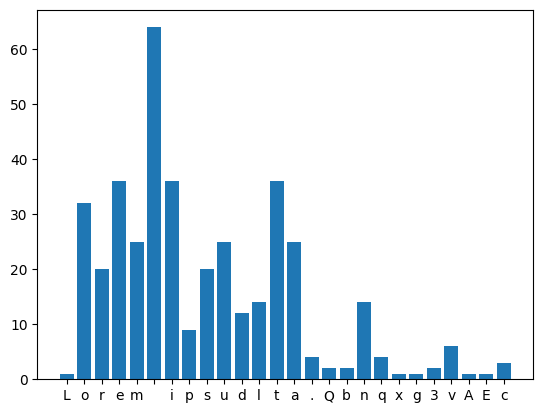

In [ ]:
plt.bar(count.keys(), count.values())

In [ ]:
probabilities = [i/count.total() for i in count.values()]
symbols = [i for i in count.keys()]
C = [sum(probabilities[:i]) for i in range(0,len(probabilities))]

In [ ]:
encoded_length = []
# We take just the first 9
divisors = [1,2,3,4,6,9,11]
for i in divisors:

    #i represent the group you are doing the length of the group
    encoded_text = ""
    for j in range(0, len(text), i):
      encoded_text += SourceCoding.encode_arithmetic(probabilities, C, text[j:j+i], symbols)

    encoded_length.append(len(encoded_text))


In [ ]:
badout_length = ceil(log2(len(count.keys()))) * len(text)

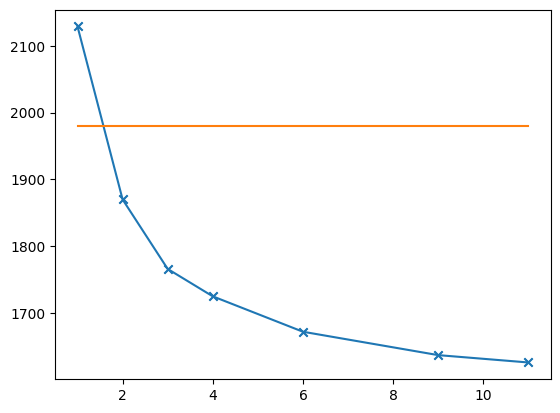

In [ ]:
plt.scatter(divisors, encoded_length, marker='x')
plt.plot(divisors, encoded_length, marker='x')
plt.plot([1, 11], [badout_length, badout_length])

# Number of bits / block of symbols considered
# orange: badout encoding

The total number of symbols was divisible only by a small number. Now there is the comparison of the bits/symbols

In [ ]:
encoded_length[-1]

1626

<BarContainer object of 2 artists>

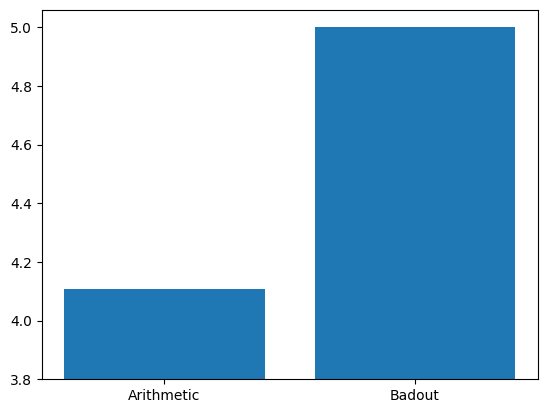

In [ ]:
#HERE you can set the offset
off = 3.8
arithmetic = encoded_length[-1]/len(text) - off
badout = badout_length/len(text) - off
dictionary_ = {'Arithmetic':arithmetic, 'Badout':badout}
plt.bar(dictionary_.keys(), dictionary_.values(), bottom = off)

We need to compare also to entropy

$H(x) = - \sum_{i}p(x_i)log_2p(x_i)$

3.97294825257934


<BarContainer object of 1 artists>

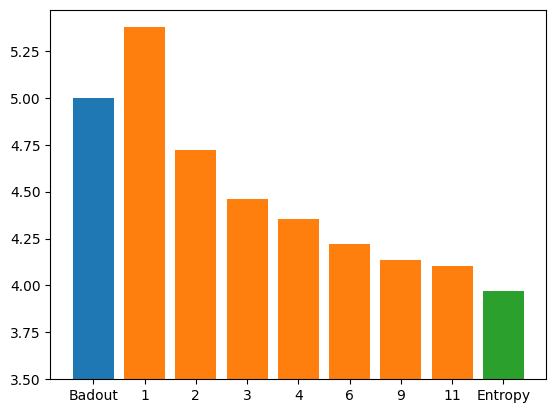

In [ ]:
offset = 3.5
entropy = -sum([i * log2(i) for i in probabilities])
print(entropy)
plt.bar('Badout', badout_length/len(text) - offset, bottom = offset)
plt.bar([str(i) for i in divisors], [i /len(text) - offset for i in encoded_length], bottom = offset)
plt.bar('Entropy', entropy-offset, bottom = offset)

# War and peace decoding

In [ ]:
!wget -q https://raw.githubusercontent.com/MattiaFiore/Source-Coding-Project/main/book-war-and-peace.txt

In [ ]:
book = ''
with open("book-war-and-peace.txt", 'r') as f:

  for i in f:
    book += i

The length of the file is divisible by: 1, 3, 193, ...

We cannot use 193 because of floating precision. So we'll use just 1 and 3.

In [ ]:
count = Counter(book)
probabilities = [i/count.total() for i in count.values()]
symbols = [i for i in count.keys()]
C = [sum(probabilities[:i]) for i in range(0,len(probabilities))]

In [ ]:
entropy = sum([p*log2(1/p) for p in probabilities])

In [ ]:
len(count.values())

82

In [ ]:
encoded_length = []
encoded_sequences = []
# We take just the first 9
divisors = [1]
for i in divisors:
    #i represent the group you are doing the length of the group
    print(f'Length of the group: {i}')
    start = time.time()
    encoded_text = ""
    for j in range(0, len(book), i):
      encoded_text += SourceCoding.encode_arithmetic(probabilities, C, book[j:j+i], symbols)

    end = time.time()

    print(f'Encoding complete, time to complete: {end-start}s')

    start = time.time()
    decoded_seq = SourceCoding.arithmetic_decode(symbols, probabilities, i, encoded_text)
    end = time.time()

    print(f'Decoding complete, time to complete: {end-start}s')
    if decoded_seq == book:
      print('Same')
    else:
      print('Different')


    encoded_length.append(len(encoded_text))
    encoded_sequences.append(encoded_text)

Length of the group: 1
Encoding complete, time to complete: 14.024579524993896s
Decoding complete, time to complete: 396.0241084098816s
Same


<BarContainer object of 1 artists>

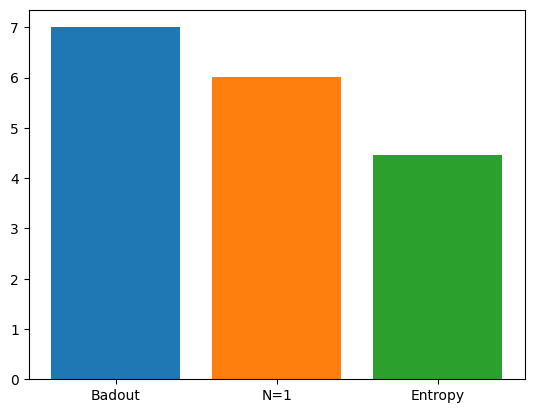

In [ ]:
offset = 0
plt.bar('Badout', 7-offset, bottom = offset)
plt.bar(['N=1'], [ i/len(book)-offset for i in encoded_length ], bottom = offset)
plt.bar('Entropy', entropy-offset, bottom = offset)

# DNA data compression

In [ ]:
DNA_sequence = "TCCATTGATTAATGGCCTGANTCGGATTAGANATCAATACACTATCAATTATTCCAATAATTTCAACATTACACCACCCACGATCAACTGAAGCTGCTACAAAATATTTCCTCACCCAAGCAGCTGCTTCANCTTTAATCCTTTTTTCAAGCACAATTAATGCCTGACAAACAGGATCATGAGACATTACCCAACTATCATCAACCCCCTCACACATTTTATTAACTATGGCTTTGGCCATAAAACTAGGACTCGCCCCACTTCACTTTTGATTACCAGAAGTAATTCAAGGGTCTTCCATAAACACAGCCTTAATTATTGTNACTTGACAAAAACTAGCCCCAATATCCCTAATCTTTTTAACCATAAATAATTTATCAACAACTATTTTAATGATAATAGGACTTGTATCTTCACTTGTCGGAGGATGAGCAGGACTTAATCAAACACAAACTCGAAAAATTATAGCCTACTCATCTATTGCTCACCTAGGGTGAATAGCAGCCATTTCCTCAATTATAACAAACATTTTAATCCTCAACCTATTAATTTACCTAATTATAACTACCTCAGTATTTTGCTTTATTATTATTACAAAATCAAAAACAATCCAAAACACAGCTACTATTTGGACAATATCACCAACACTAACAATTACCATAATACTTTCTTTACTTTCACTAGGAGGACTACCGCCACTAACAGGATTTATACCAAAATGAATAATTATAGAAGAACTTATTAATCAAAACTTTACTACAATTACTACTATGATAGCACTATCGTCCTTATTAAGCCTATTTTTTTATATTCGACTAACATATACAACTTCACTTACACTATCCCCAAACACAACCCAAACGAAATTTAAATGACGATTTTACCCAAACATAAAAACCACAGTAATTATAGTCTCTACAACAGTCACAATTTTTATATTACCGATACTTCCAATAATTTTGATATAAAAACTTAGGATAAACTAAACCAAGAGCCTTCAAAGCTCAAAAAAGGGGTGTAACCCCCCTAGTTTTTGTAAGACTTGTAAAATACTAATTTACATCTCTTGAATGCAACTTAAACACTTTAATTAAGCTAAAACCTTACTGAATAGGCGGGCTTTTAACCCACGAAAAATTAATTAACAGCTAATTTCCCAAACCAACGGGCTTCTATTCGCTTCCCCCGTCTGGGGGGGGAAACGGGAGAAGCCCCGGAGCCTTTAAGGGCTCTTCTTCAAACTTGCAATTTGACGTAAATCACTTACTTCGGGGCTTGATAAAGAAAGGAATTAAACCAATGTGAATAGGACTACAGCCTACCGCCTACCATTCGGCCACTTTACCTGTGTTTATTAATCGTTGA"
len(DNA_sequence)

1365

This are all the possible divisors of 1365:

1, 3, 5, 7, 13, 15, 21, 35, 39, 65, 91, 105, 195, 273, 455, 1365

Using Badout code we would need a total of:

$1365 \cdot 2 = 2730$ bits

In [ ]:
count = Counter(DNA_sequence)
probabilities = [i/count.total() for i in count.values()]
symbols = [i for i in count.keys()]
C = [sum(probabilities[:i]) for i in range(0,len(probabilities))]

In [ ]:
encoded_length = []
encoded_sequences = []
# We take just the first 9
divisors = [1, 3, 5, 7, 13, 15, 21]
for i in divisors:
    #i represent the group you are doing the length of the group

    encoded_text = ""
    for j in range(0, len(DNA_sequence), i):
      encoded_text += SourceCoding.encode_arithmetic(probabilities, C, DNA_sequence[j:j+i], symbols)

    decoded_seq = SourceCoding.arithmetic_decode(symbols, probabilities, i, encoded_text)
    if decoded_seq == DNA_sequence:
      print('Uguali')
    else:
      print('Diversi')


    encoded_length.append(len(encoded_text))
    encoded_sequences.append(encoded_text)

Uguali
Uguali
Uguali
Uguali
Uguali
Uguali
Uguali


In [ ]:
entropy = sum([p*log2(1/p) for p in probabilities])

<BarContainer object of 1 artists>

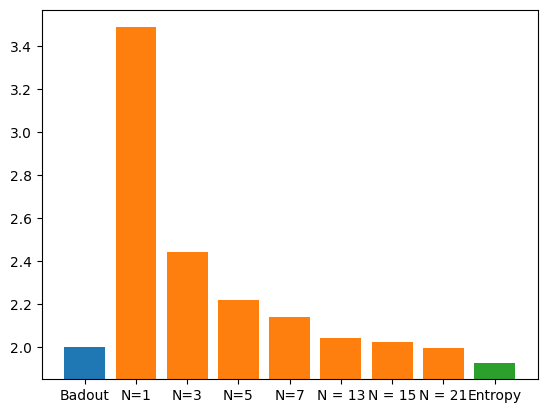

In [ ]:
offset = 1.85
plt.bar('Badout', 2730/len(DNA_sequence)-offset, bottom = offset)
plt.bar(['N=1', 'N=3', 'N=5', 'N=7', 'N = 13', 'N = 15', 'N = 21'], [ i/len(DNA_sequence)-offset for i in encoded_length ], bottom = offset)
plt.bar('Entropy', entropy-offset, bottom = offset)

<BarContainer object of 1 artists>

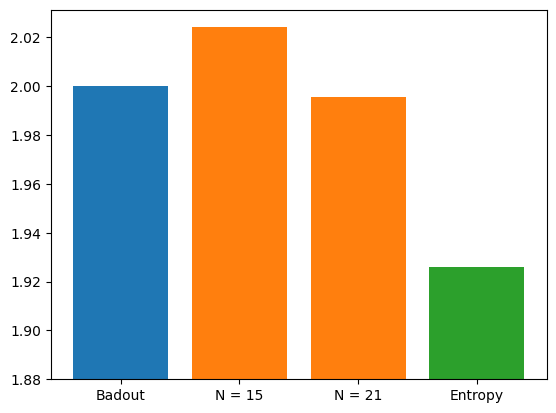

In [ ]:
offset = 1.88
plt.bar('Badout', 2730/len(DNA_sequence)-offset, bottom = offset)
plt.bar(['N = 15', 'N = 21'], [encoded_length[-2]/len(DNA_sequence)-offset , encoded_length[-1]/len(DNA_sequence)-offset] , bottom = offset)
plt.bar('Entropy', entropy-offset, bottom = offset)